In [164]:
import datetime
import numpy as np
import pandas as pd
import tushare as ts
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
sns.set_style('whitegrid',{'font.sans-serif':['FangSong','Arial']})

In [166]:
scale= 5
stock = '601933'
start_date = datetime.datetime.now() + datetime.timedelta(days= -scale)
dates = pd.date_range(datetime.datetime.strftime(start_date, '%Y-%m-%d'), periods=scale)
dfs = []
for date in dates:
    try:
        dfs.append(ts.get_tick_data(stock,date=date.strftime('%Y-%m-%d')))
    except:
        pass
df = pd.concat(dfs)
df.head(10)

,time,price,change,volume,amount,type
0,"alert(""当天没有数据"");",NaN,NaN,NaN,NaN,NaN
1,window.close();,NaN,NaN,NaN,NaN,NaN
2,</script>,NaN,NaN,NaN,NaN,NaN
0,"alert(""当天没有数据"");",NaN,NaN,NaN,NaN,NaN
1,window.close();,NaN,NaN,NaN,NaN,NaN
2,</script>,NaN,NaN,NaN,NaN,NaN
0,15:00:00,11.55,--,0.0,0.0,买盘
1,15:00:00,11.55,--,91.0,105105.0,卖盘
2,14:59:59,11.55,--,1258.0,1452990.0,卖盘
3,14:59:56,11.55,--,720.0,831600.0,买盘


In [167]:
df['date']='2018-01-19 ' + df['time']
df.set_index('date', inplace=True)

In [168]:
df['t_price'] = df['price'].round()
df.head(10)

,time,price,change,volume,amount,type,t_price
date,,,,,,,
"2018-01-19 alert(""当天没有数据"");","alert(""当天没有数据"");",NaN,NaN,NaN,NaN,NaN,NaN
2018-01-19 window.close();,window.close();,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-19 </script>,</script>,NaN,NaN,NaN,NaN,NaN,NaN
"2018-01-19 alert(""当天没有数据"");","alert(""当天没有数据"");",NaN,NaN,NaN,NaN,NaN,NaN
2018-01-19 window.close();,window.close();,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-19 </script>,</script>,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-19 15:00:00,15:00:00,11.55,--,0.0,0.0,买盘,12.0
2018-01-19 15:00:00,15:00:00,11.55,--,91.0,105105.0,卖盘,12.0
2018-01-19 14:59:59,14:59:59,11.55,--,1258.0,1452990.0,卖盘,12.0


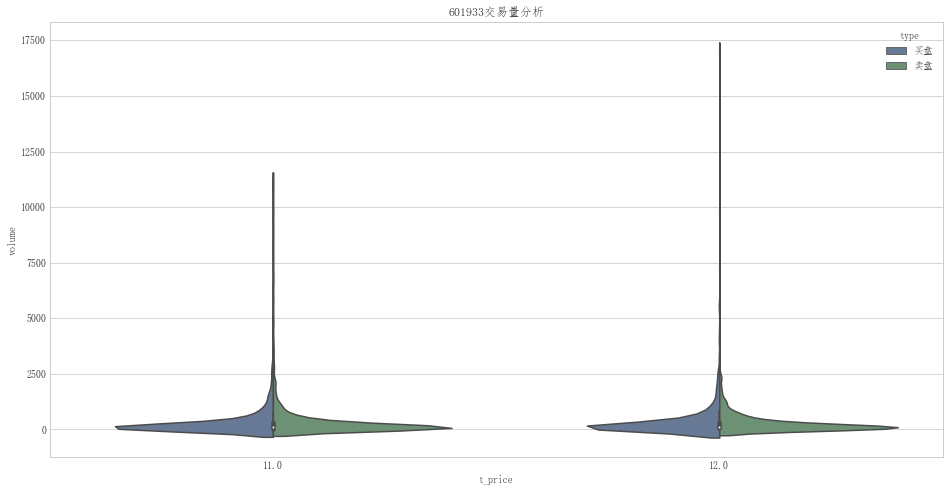

In [169]:
fig, axes= plt.subplots(figsize = (16, 8))  
axes.set_title('%s交易量分析' % stock)
# sns.stripplot(x='t_price', y='volume', hue='type', data=df, jitter=True, dodge=True, ax = axes)
sns.violinplot(x='t_price', y='volume', hue='type', data=df[df['type'] != '中性盘' ],  split=True, ax = axes)

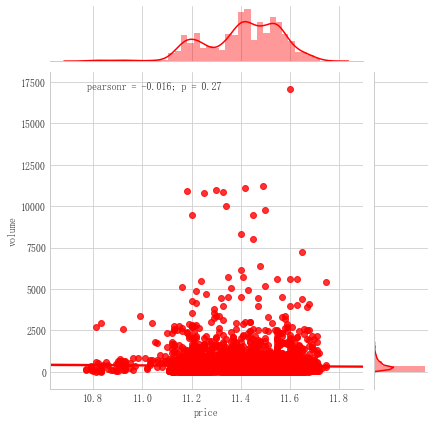

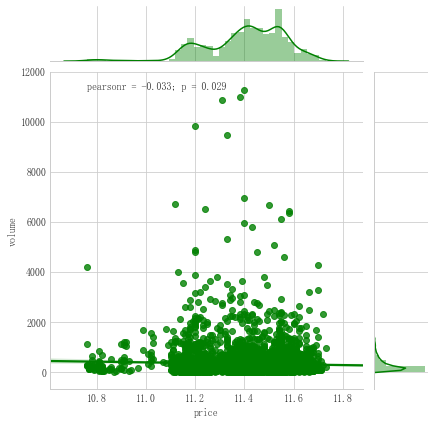

In [170]:
# fig, axes= plt.subplots(1,2,figsize=(12, 6), sharex=True)  
# axes[0].set_title('%s买盘交易量分析' % stock)
sns.jointplot(x='price', y='volume', data=df[df['type'] == '买盘' ],kind='reg', color='r') 
sns.jointplot(x='price', y='volume', data=df[df['type'] == '卖盘' ],kind='reg', color='g') 